# Logistic Regression

*Logistic regression* is a simple machine learning method you can use to predict the value of a numeric categorical variable based on its relationship with predictor variables.


## Logistic Regression Assumptions

- The data is free of missing values
- The predictant variable is binary (that it only accepts two values) or ordinal, (a categorical variable with ordered values)
- All predictors are independent of one another,
- There are at least 50 observations per predictor variable (to ensure reliable results)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Load Data

In [4]:
titanic_training = pd.read_csv('../../inputs/titanic.csv')
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Variable description

| Column | Description |
| - | - |
| Survived | Survival (0 = No, 1 = Yes) |
| Pclass | Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Name | Name |
| Sex | Sex |
| Age | Age  |
| SibSp | Number of Siblings/Spouses Aboard |
| Parch | Number of Parents/Children Aboard  |
| Ticket | Ticket Number |
| Fare | Passenger Fare (British pound) |
| Cabin | Cabin  |
| Embarked | Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton, Ireland) |


### Checking that your target variable is binary

<AxesSubplot:xlabel='Survived', ylabel='count'>

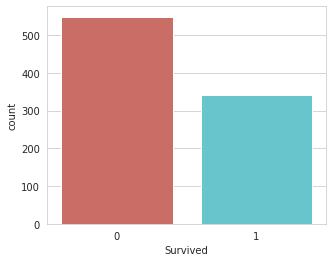

In [6]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

### Checking for missing values

In [7]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Taking care of missing values

*Dropping missing values*

Let's go ahead and drop all the variables that aren't relevant for predicting survival. 

- Survived - The variable is obviously relevant
- Pclass - Does a passenger's class on a boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or spouses) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are parents or children) affect a person survivability? Probability
- Fare - Does the fair a person paid effect his survivability? Maybe - let's keep it
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it 

What about a person's name, ticket number and passenger ID number? They're irrelevant for predicting survivability. So let's drop all of this.

In [9]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Imputing Missing Values

<AxesSubplot:xlabel='Parch', ylabel='Age'>

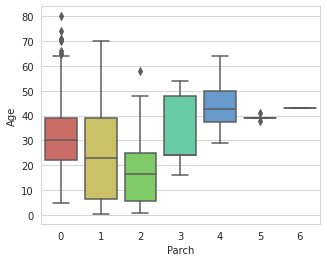

In [10]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

Parch represents the number of relatives on the boat that are either children or parents. 

So you can see here, the younger a person is, the more likely they are to have two relatives on the boat that are probably going to be parent, of course, right, because this median value here is less than 20.

Now, the older a person is, with a median value greater than 40, the more likely they are to have four under Parch, so they're more likely to have
four individuals on the boat who are either parents or children.

So this is a decent enough relationship to use to make an approximation for the age of a passenger based on the number of parents or children they have on the boat with them.


In [11]:
parch_groups = titanic_data.groupby(titanic_data.Parch)
parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


### Fill missing Age values based on the Parch category

In [12]:
# get missing values
missing_series = titanic_data.Age.isnull()
missing_series

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [13]:
# create a mapping series
mapping_series = parch_groups.mean().Age.astype(int)
mapping_series

Parch
0    32
1    24
2    17
3    33
4    44
5    39
6    43
Name: Age, dtype: int64

In [14]:
# Filling missing values
# titanic_data_old = titanic_data.copy() # to copy dataframe
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Parch'].map(mapping_series))
# and checking
titanic_data.loc[missing_series] 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,32.0,0,0,8.4583,Q
17,18,1,2,male,32.0,0,0,13.0000,S
19,20,1,3,female,32.0,0,0,7.2250,C
26,27,0,3,male,32.0,0,0,7.2250,C
28,29,1,3,female,32.0,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,32.0,0,0,7.2292,C
863,864,0,3,female,17.0,8,2,69.5500,S
868,869,0,3,male,32.0,0,0,9.5000,S
878,879,0,3,male,32.0,0,0,7.8958,S


In [15]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.882346,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.130843,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,31.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [17]:
# Let's drop rows with null in Embarked
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


### Converting categorical variables to a dummy indicators

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# turn Sex into something numerical
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
# 1 = male / 0 = female
gender_df = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [21]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:6]

array([2, 0, 2, 2, 2, 1])

In [22]:
# S = 2 / Q = 1 / 0  = C / 
from sklearn.preprocessing import OneHotEncoder

# here is 3 different values so we need 3 bollean columns
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()

embarked_df = pd.DataFrame(embarked_1hot_mat, columns=['C', 'Q', 'S'])
embarked_df.head(6)

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0


In [23]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df], axis=1, verify_integrity=True).astype(float)
titanic_dmy.head()
# All categorical variables are now represented by binary 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


### Checking for independence between features

<AxesSubplot:>

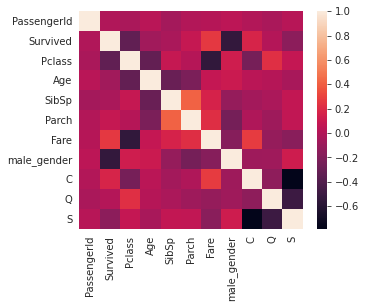

In [25]:
sb.heatmap(titanic_dmy.corr())

In [26]:
titanic_dmy.drop(['Fare', 'Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


We have cleaned our dataset even more, so we have dropped the variables that are **definitely not independent of one another**, and now it's time to go ahead and check that our dataset is of sufficient size to do a logistic regression

### Checking that size of the dataset is sufficient 

A rule of thumb that you should have at least 50 records per predictive feature, so let's see how many predictors do we have in this dataset.

C Q S first, male_gender, Parch, Age, SibSp and PassangerId so 6 x 50 = 300. So we would need 300 records in our dataset


In [27]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [28]:
x_train, x_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1), titanic_dmy.Survived, test_size=0.2, random_state=200)

In [32]:
x_train.shape, y_train.shape

((711, 8), (711,))

In [34]:
x_train.head()

,PassengerId,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


### Deploying and evaluating the model

In [37]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_pred = LogReg.predict(x_test)

## Model Evaluation

### Classification report w/o cross-validation

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### K-fold cross-validation & confusion matrix

In [44]:
y_train_pred = cross_val_predict(LogReg, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)
# What this confusion matrix is telling us is that, 337 and 180 are the number of correct predictions 91 and 63 are the number of incorrect predictions


array([[377,  63],
       [ 91, 180]])

In [45]:
precision_score(y_train, y_train_pred)

0.7407407407407407

## Make a test prediction

In [47]:
# Let's select a random passenger and copy his data with some changes (Age)
titanic_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1, -1)
print(LogReg.predict(test_passenger))

[1.]


In [50]:
print(LogReg.predict_proba(test_passenger))
#  the probability of this prediction being correct is 73%.

[[0.26351831 0.73648169]]
